<h5 style="color:#FFFFA5"> 로지스틱 회귀 </h5>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('./data/LogisticRegressionData.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

LogisticRegression()

In [16]:
reg.predict([[6], [8], [2]])

array([1, 1, 0], dtype=int64)

In [17]:
pred = reg.predict_proba([[6]])

array([[0.14150735, 0.85849265]])

In [19]:
y_pred = reg.predict(X_test)
y_pred, X_test

(array([1, 0, 1, 1], dtype=int64),
 array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]))

In [20]:
reg.score(X_test, y_test)

0.75

In [23]:
X_range = np.arange(min(X), max(X), 0.1)
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [26]:
# p = 1 / (1 + (e^-y))
# y = mx + b
m = reg.coef_
b = reg.intercept_
y = m * X_range + b
P = 1 / (1 + (np.exp(-y)))
P = P.reshape(-1)
P

array([0.01035705, 0.01161247, 0.01301807, 0.0145913 , 0.01635149,
       0.01832008, 0.02052073, 0.02297953, 0.02572521, 0.02878929,
       0.03220626, 0.03601375, 0.04025264, 0.04496719, 0.05020505,
       0.05601722, 0.06245802, 0.06958479, 0.07745757, 0.08613861,
       0.09569165, 0.10618106, 0.11767067, 0.13022241, 0.14389468,
       0.15874043, 0.17480509, 0.19212422, 0.2107211 , 0.23060425,
       0.25176509, 0.27417574, 0.29778732, 0.32252874, 0.34830616,
       0.3750034 , 0.40248315, 0.43058927, 0.45914989, 0.48798142,
       0.51689314, 0.54569221, 0.57418876, 0.60220088, 0.6295591 ,
       0.65611024, 0.68172044, 0.70627722, 0.72969059, 0.75189324,
       0.77283994, 0.79250621, 0.81088652, 0.82799203, 0.84384828,
       0.85849265, 0.871972  , 0.88434036, 0.89565683, 0.90598377,
       0.91538521, 0.92392546, 0.93166808, 0.93867499, 0.9450058 ,
       0.95071738, 0.95586346, 0.96049453, 0.96465764, 0.96839647,
       0.97175136, 0.97475939, 0.97745455, 0.97986786, 0.98202

In [37]:
def sigmoid(reg, x):
    m = reg.coef_
    b = reg.intercept_
    y = m * X_range + b
    P = 1 / (1 + (np.exp(-y)))
    P = P.reshape(-1)
    return P

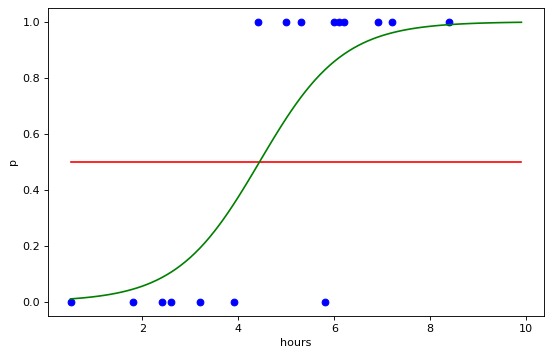

In [39]:
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')
plt.plot(X_range, sigmoid(reg, X_range), color='green')
plt.xlabel('hours')
plt.ylabel('p')
plt.show()

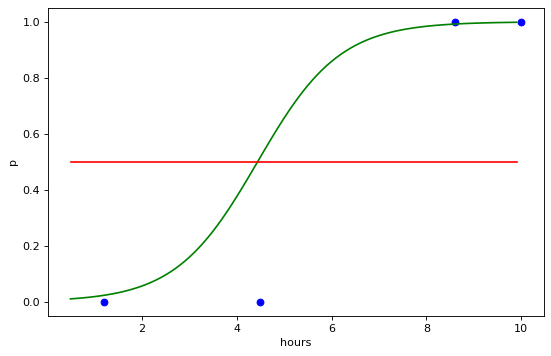

In [33]:
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, P, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red') #X_range개수만큼 0.5로 가득 찬 배열
plt.xlabel('hours')
plt.ylabel('p')
plt.show()


In [35]:
reg.predict(([[4.5]]))

array([1], dtype=int64)

<h5 style="color:#FFFFA5"> 혼동행렬 </h5>

In [40]:
from sklearn.metrics import confusion_matrix

In [44]:
y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]], dtype=int64)

In [45]:
y_pred = reg.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[6, 1],
       [1, 8]], dtype=int64)